In [22]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [23]:
df = pd.read_csv('income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


Text(0, 0.5, 'Income($)')

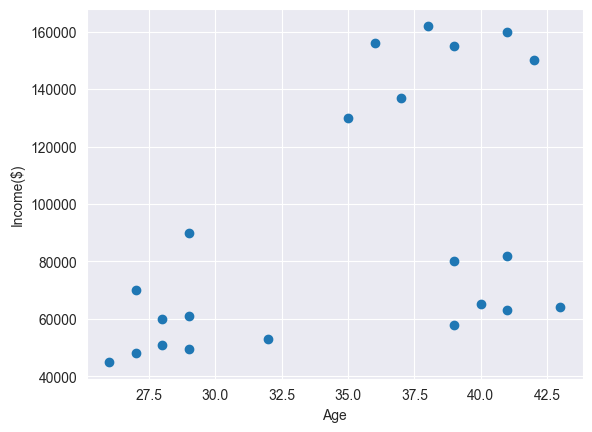

In [24]:
plt.scatter(df['Age'], df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [25]:
km = KMeans(n_clusters=3)
km

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [26]:
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [27]:
df['cluster'] = y_pred
df.head

<bound method NDFrame.head of         Name  Age  Income($)  cluster
0        Rob   27      70000        0
1    Michael   29      90000        0
2      Mohan   29      61000        2
3     Ismail   28      60000        2
4       Kory   42     150000        1
5     Gautam   39     155000        1
6      David   41     160000        1
7     Andrea   38     162000        1
8       Brad   36     156000        1
9   Angelina   35     130000        1
10    Donald   37     137000        1
11       Tom   26      45000        2
12    Arnold   27      48000        2
13     Jared   28      51000        2
14     Stark   29      49500        2
15    Ranbir   32      53000        2
16    Dipika   40      65000        2
17  Priyanka   41      63000        2
18      Nick   43      64000        2
19      Alia   39      80000        0
20       Sid   41      82000        0
21     Abdul   39      58000        2>

C:\Users\TheAn\AppData\Local\Temp\ipykernel_32116\7706696.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


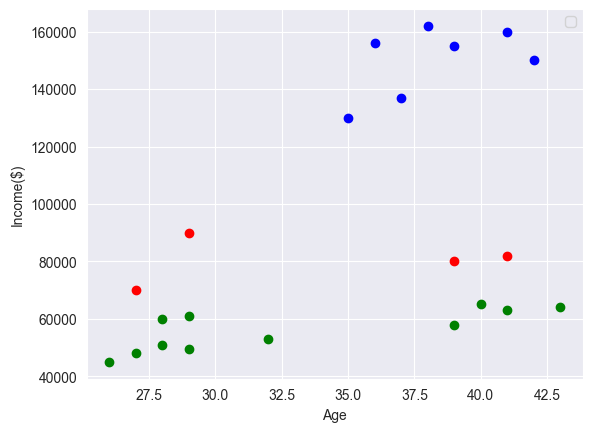

In [28]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.Age, df1['Income($)'], color='red')
plt.scatter(df2.Age, df2['Income($)'], color='blue')
plt.scatter(df3.Age, df3['Income($)'], color='green')

plt.xlabel('Age')
plt.ylabel('Income($)')
#Screw up because the features are not scaled properly, need to use MinMaxScaler

In [34]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [37]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age', 'Income($)']])
df['cluster'] = y_pred

Text(0, 0.5, 'Income($)')

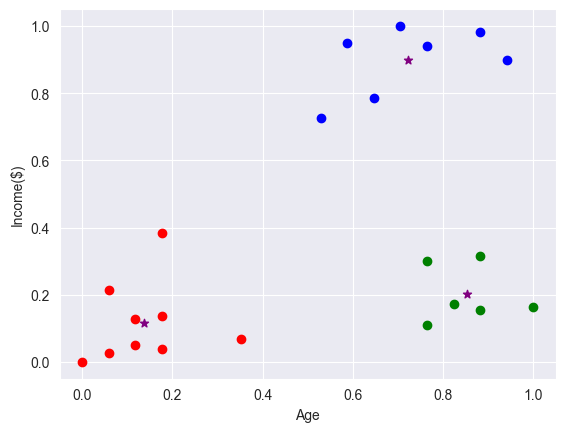

In [40]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.Age, df1['Income($)'], color='red')
plt.scatter(df2.Age, df2['Income($)'], color='blue')
plt.scatter(df3.Age, df3['Income($)'], color='green')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*')

plt.xlabel('Age')
plt.ylabel('Income($)')
#Fixed

In [41]:
#Elbow technique
k_range = range(1, 10)

sse = []

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append([km.inertia_])

In [42]:
sse

[[5.434011511988176],
 [2.3456144914725936],
 [0.47507834985530945],
 [0.34910470944195643],
 [0.2664030124668415],
 [0.22443334487241415],
 [0.1768104413388771],
 [0.15128011756971038],
 [0.11314812855825188]]

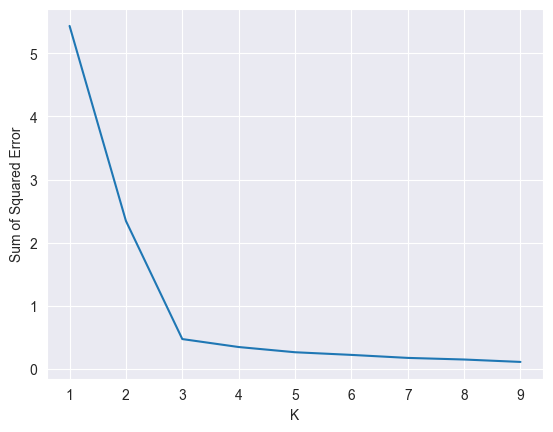

In [46]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_range, sse)
#Elbow is at 3